In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [2]:
%matplotlib inline

In [15]:
file_path = "./Series_1.xlsx"

In [16]:
df = pd.read_excel(file_path)

In [17]:
df.head()

,Time,Value
0,1,0.000000
1,2,-0.090263
2,3,0.749995
3,4,1.247887
4,5,0.131282


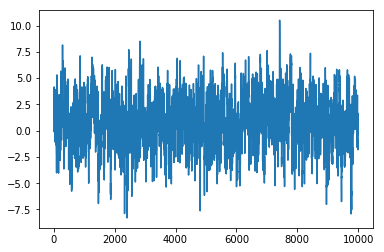

In [18]:
plt.plot(df["Value"])

In [19]:
X = df["Value"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -22.184930
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series is Stationary


In [20]:
df["Diff_Value"] = df["Value"].diff()

In [21]:
diff_values = df["Diff_Value"].values
Y = diff_values[~np.isnan(diff_values)]

In [22]:
ts_values_orig = df["Value"].values
ts_values = ts_values_orig[:-1]

In [23]:
X = sm.add_constant(ts_values)

In [24]:
model = sm.OLS(Y,X)
results = model.fit()

In [25]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     492.2
Date:                Sat, 31 Aug 2019   Prob (F-statistic):          1.74e-106
Time:                        16:56:52   Log-Likelihood:                -14130.
No. Observations:                9999   AIC:                         2.826e+04
Df Residuals:                    9997   BIC:                         2.828e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0659      0.010      6.347      0.0

In [26]:
results.tvalues[1]

-22.184930227348683